Import All Required Libraries

In [ ]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

Dataset load from Keras and data preparation

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

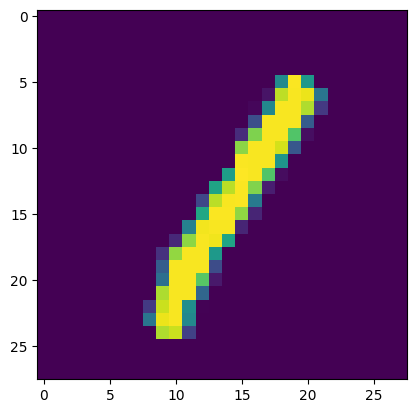

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[23])

In [ ]:
# to convert all value in between 0-1 we require to divide it 255
X_train = X_train/255
X_test = X_test/255

Build up the Keras Sequential Model

In [ ]:
#Flattaning layer operation will be require to give 784 pixel values as input
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #It will convert data into 1D --784inputs
model.add(Dense(128,activation="relu"))#no need to give inputs flatten layer will automatically gives  #here 128nodes for input layer
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))  #softmax bz we are having more than one nodes in output

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])
#in sparse categorical crossentropy we dont need to do one hot encoding

In [ ]:
history= model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 18s 11ms/step - loss: 0.2860 - accuracy: 0.9175 - val_loss: 0.1450 - val_accuracy: 0.9575
Epoch 2/25
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1170 - accuracy: 0.9641 - val_loss: 0.1112 - val_accuracy: 0.9657
Epoch 3/25
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.0941 - val_accuracy: 0.9718
Epoch 4/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0899 - val_accuracy: 0.9740
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 0.0906 - val_accuracy: 0.9742
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0927 - val_accuracy: 0.9755
Epoch 7/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.1151 - val_ac

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_prob

array([[2.65717708e-15, 2.06850925e-10, 1.43759605e-11, ...,
        9.99999940e-01, 5.52647283e-13, 1.29231641e-13],
       [1.00748014e-18, 1.51657116e-12, 9.99999940e-01, ...,
        3.51422332e-19, 1.31704227e-19, 1.21454001e-32],
       [1.41024236e-16, 9.99996841e-01, 1.83550686e-09, ...,
        3.04858054e-06, 3.08198729e-08, 3.40282004e-11],
       ...,
       [1.64785515e-28, 4.90023992e-20, 1.48496469e-27, ...,
        1.29870880e-17, 2.44680785e-20, 4.67665864e-14],
       [1.67816189e-32, 7.65135120e-21, 5.42316219e-27, ...,
        3.87214466e-24, 2.47409023e-14, 1.17173057e-22],
       [7.23713048e-23, 5.49730703e-29, 1.24426553e-27, ...,
        1.61727656e-22, 1.01321650e-23, 4.40143410e-21]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1) #Taking only one higher probablity

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9783

Graphical Representation of loss, Validation loss, accuracy and Validation accuracy

In [ ]:
import matplotlib.pyplot as plt

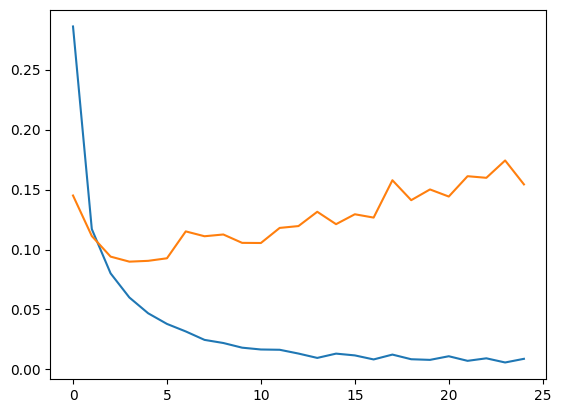

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

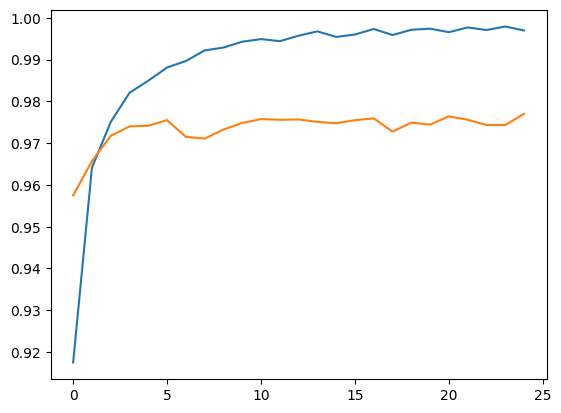

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

Testing

In [ ]:
plt.imshow(X_test[0])

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

In [ ]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 42ms/step


array([[2.6571773e-15, 2.0685094e-10, 1.4375989e-11, 2.5382935e-11,
        8.8602845e-24, 3.0177300e-20, 3.7631421e-19, 1.0000000e+00,
        5.5264528e-13, 1.2923141e-13]], dtype=float32)

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([7])

This prediction consists of the ten activations or probabilities from the output neurons.
Since we need to generate a result out of that, we are going to use the argmax function. This function returns the index of the highest value.
In this case this is equivalent to the digit with the highest probability or activation.